# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidence to answer the following questions.

1. Which hosts are the busiest and why?
2. How many neighborhood groups are available and which shows up the most?
3. Are private rooms the most popular in manhattan?
4. Which hosts are the busiest and based on their reviews?
5. Which neighorhood group has the highest average price?
6. Which neighborhood group has the highest total price?
7. Which top 5 hosts have the highest total price?
8. Who currently has no (zero) availability with a review count of 100 or more?
9. What host has the highest total of prices and where are they located?
10. When did Danielle from Queens last receive a review?


In [3]:
import pandas as pd # imported pandas as pd


In [4]:
ab_nyc_2019 = pd.read_csv(r'C:\Users\jjs61\OneDrive\Desktop\Data Analytics\Coding_Temple\week_3\Data\AB_NYC_2019.csv')  # Read in CSV file


In [5]:
display(ab_nyc_2019.describe()) # looked at the high- level data summary
print(f'There are {len(ab_nyc_2019)} rows of data in our dataframe.')


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


There are 48895 rows of data in our dataframe.


<Axes: xlabel='neighbourhood_group', ylabel='price'>

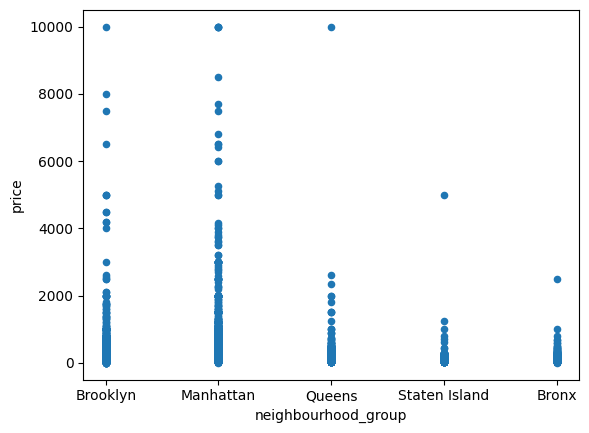

In [6]:
ab_nyc_2019.plot.scatter(x="neighbourhood_group", y="price")

In [7]:
# Accounts with no reviews should be considered inactive or new/never used    (analyzed to see what data would be removed if nan reviews were removed)

num_of_rev = ab_nyc_2019[ab_nyc_2019['number_of_reviews'] < 1]

# We will remove from the dataframe

In [8]:
# removed the NaN data from the dataframe
ab_nyc_2019.dropna(subset =['last_review'],inplace=True)

# displayed that insa stats to verify nulls were removed
display(ab_nyc_2019.isna().sum())



id                                 0
name                               6
host_id                            0
host_name                         16
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


In [9]:
# Which hosts are the busiest and based on their reviews?   
# Busiest Host is anyone with zero availablity and the highest reviews
# Wanda from Brooklyn is the busiest host with zero availability and 480 reviews.

busiest_host = ab_nyc_2019[ab_nyc_2019['availability_365'] < 1]


display(busiest_host.sort_values('number_of_reviews', ascending=False).head(5))










,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0
9974,7670562,JFK 10 & LGA 15 MINUTES A/C PRIVATE BEDROOM,22959695,Gurpreet Singh,Queens,Richmond Hill,40.69604,-73.82449,Private room,50,1,424,2018-11-25,8.86,5,0
9976,7675781,JFK 10 & LGA 15 MINUTES AWAY A/C PRIVATE BED...,22959695,Gurpreet Singh,Queens,Richmond Hill,40.69463,-73.82610,Private room,50,1,408,2018-11-24,8.56,5,0
22104,17779504,Relaxing Quiet Room Just 6 Mins from JFK Airport!,121391142,Deloris,Queens,Springfield Gardens,40.66535,-73.76367,Private room,65,1,368,2019-06-21,13.24,2,0
5876,4282178,A Superhost SALE! DELUXE Room!,21641206,Veronica,Brooklyn,Bedford-Stuyvesant,40.69724,-73.94914,Private room,53,1,351,2019-06-24,6.09,4,0


In [10]:
# How many neighborhood groups are available and which shows up the most?
# There are five neighborhood groupds and Manhattan shows up the most.

display(ab_nyc_2019.groupby("neighbourhood_group", as_index=False).sum()[['neighbourhood_group', 'calculated_host_listings_count']])

# There are five neighborhoods with Manhattan 

,neighbourhood_group,calculated_host_listings_count
0,Bronx,1931
1,Brooklyn,36727
2,Manhattan,145852
3,Queens,15343
4,Staten Island,750


In [11]:
# Are private rooms the most popular in manhattan?

display(ab_nyc_2019.groupby(["neighbourhood_group", 'room_type'], ).count()[['id']])


id
neighbourhood_group room_type            
Bronx               Entire home/apt   309
                    Private room      524
                    Shared room        43
Brooklyn            Entire home/apt  8164
                    Private room     7993
                    Shared room       290
Manhattan           Entire home/apt  9967
                    Private room     6309
                    Shared room       356
Queens              Entire home/apt  1742
                    Private room     2680
                    Shared room       152
Staten Island       Entire home/apt   150
                    Private room      159
                    Shared room         5

In [12]:
# Which hosts are the busiest and why?

# same as question 1

display(busiest_host.sort_values('number_of_reviews', ascending=False).head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0
9974,7670562,JFK 10 & LGA 15 MINUTES A/C PRIVATE BEDROOM,22959695,Gurpreet Singh,Queens,Richmond Hill,40.69604,-73.82449,Private room,50,1,424,2018-11-25,8.86,5,0


In [13]:
# Which neighorhood group has the highest average price?
# Manhattan has the highest average price at $180.05 a nite.

display(ab_nyc_2019.groupby('neighbourhood_group').mean('price').sort_values('price', ascending=False).round(2))




,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,
Manhattan,17674795.89,6.326809e+07,40.77,-73.97,180.05,7.01,27.33,1.27,8.77,109.32
Brooklyn,17538709.32,5.469297e+07,40.68,-73.95,121.45,5.32,29.58,1.28,2.23,105.88
Queens,20788083.32,9.282430e+07,40.73,-73.87,95.76,4.22,34.31,1.94,3.35,150.51
Staten Island,21059228.03,9.740580e+07,40.61,-74.10,89.96,3.42,36.75,1.87,2.39,205.64
Bronx,21458028.21,1.007616e+08,40.85,-73.88,79.55,3.93,32.39,1.84,2.20,170.94


In [14]:
# Which neighbor hood group has the highest total price?
#  Manhattan has the highest total prices

display(ab_nyc_2019.groupby('neighbourhood_group').sum('price').sort_values('price', ascending=False).round(0))

# Brooklyn and Queens had the highest individual price at $10,000 a night.

display(ab_nyc_2019.groupby('neighbourhood_group').max('price').sort_values('price', ascending=False).round(0))



,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,
Manhattan,293967205197,1052274820942,678020.0,-1230334.0,2994633,116596,454569,21158.0,145852,1818259
Brooklyn,288459152160,899535325995,669143.0,-1216272.0,1997467,87511,486574,21105.0,36727,1741397
Queens,95084693093,424578351144,186305.0,-337887.0,438018,19307,156950,8879.0,15343,688425
Bronx,18797232709,88267190676,35783.0,-64722.0,69689,3445,28371,1610.0,1931,149744
Staten Island,6612597600,30585421501,12752.0,-23269.0,28249,1074,11541,588.0,750,64571


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
neighbourhood_group,,,,,,,,,,
Brooklyn,36455809,272327753,41.0,-74.0,10000,999,488,14.0,103,365
Queens,36427429,272872092,41.0,-74.0,10000,500,629,21.0,103,365
Manhattan,36425863,273361532,41.0,-74.0,9999,1250,607,58.0,327,365
Bronx,36442252,273841667,41.0,-74.0,800,186,321,10.0,13,365
Staten Island,36438336,272557707,41.0,-74.0,625,33,333,10.0,8,365


In [15]:
# Which top 5 hosts have the highest total price?
# Erin, Kathrine, Oldon, Amy, and Rum have the highest total price.
ab_nyc_2019.sort_values('price', ascending=False).head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
30268,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,2018-09-18,0.18,1,251


In [16]:
# Who currently has no (zero) availability with a review count of 100 or more?
# Wanda from Brooklyn as zero availability and the highest reviews at 480

zero_availability = busiest_host[busiest_host['number_of_reviews'] >= 100].sort_values('number_of_reviews', ascending=False).head(5)
zero_availability




,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
471,166172,LG Private Room/Family Friendly,792159,Wanda,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0
9974,7670562,JFK 10 & LGA 15 MINUTES A/C PRIVATE BEDROOM,22959695,Gurpreet Singh,Queens,Richmond Hill,40.69604,-73.82449,Private room,50,1,424,2018-11-25,8.86,5,0
9976,7675781,JFK 10 & LGA 15 MINUTES AWAY A/C PRIVATE BED...,22959695,Gurpreet Singh,Queens,Richmond Hill,40.69463,-73.82610,Private room,50,1,408,2018-11-24,8.56,5,0
22104,17779504,Relaxing Quiet Room Just 6 Mins from JFK Airport!,121391142,Deloris,Queens,Springfield Gardens,40.66535,-73.76367,Private room,65,1,368,2019-06-21,13.24,2,0
5876,4282178,A Superhost SALE! DELUXE Room!,21641206,Veronica,Brooklyn,Bedford-Stuyvesant,40.69724,-73.94914,Private room,53,1,351,2019-06-24,6.09,4,0


In [17]:
# What host has the highest total of prices and where are they located?
# Sonder (NYC) has the highest total of prices and they are located in the Financial District in Manhattan.
display(ab_nyc_2019.groupby(['host_id','host_name','neighbourhood','neighbourhood_group']).sum('price').round(0).sort_values('price', ascending=False))




,,,,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,host_name,neighbourhood,neighbourhood_group,,,,,,,,,
219517861,Sonder (NYC),Financial District,Manhattan,5575663113,6920.0,-12582.0,47548,502,1129,354.0,55590,52651
205031545,Red Awning,Midtown,Manhattan,964500026,1386.0,-2515.0,24194,403,127,21.0,1666,7298
836168,Henry,Upper West Side,Manhattan,50490959,367.0,-666.0,15000,270,227,4.0,99,2914
1177497,Jessica,Clinton Hill,Brooklyn,50161458,448.0,-814.0,14850,11,595,10.0,121,3997
20582832,Kathrine,Astoria,Queens,7003697,41.0,-74.0,10000,100,2,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
84497333,Jennifer,SoHo,Manhattan,17979764,41.0,-74.0,10,5,2,0.0,1,0
167570251,Rachel,Sunset Park,Brooklyn,25839759,41.0,-74.0,10,1,14,1.0,1,4
97001292,Maria,Jamaica,Queens,18490141,41.0,-74.0,10,1,43,2.0,1,252


In [18]:
# When did Danielle from Queens last receive a review?
# Daniel from Queens received her last review on July, 8th, 2019.

daniel = ab_nyc_2019['host_name'] == "Danielle"
queens = ab_nyc_2019['neighbourhood_group'] == 'Queens'
ab_nyc_2019[daniel & queens].sort_values('last_review', ascending=False)



,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
22469,18173787,Cute Tiny Room Family Home by LGA NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76380,-73.87238,Private room,48,1,436,2019-07-08,16.03,5,337
21517,17222454,Sun Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76367,-73.87088,Private room,48,1,417,2019-07-07,14.36,5,338
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
22068,17754072,Bed in Family Home Near LGA Airport,26432133,Danielle,Queens,East Elmhurst,40.76389,-73.87155,Shared room,38,1,224,2019-07-06,7.96,5,80
7086,5115372,Comfy Room Family Home LGA Airport NO CLEANING...,26432133,Danielle,Queens,East Elmhurst,40.76374,-73.87103,Private room,54,1,430,2019-07-03,13.45,5,347
33861,26814763,One bedroom with full bed / 1 stop from Manhattan,201647469,Danielle,Queens,Long Island City,40.74565,-73.94699,Private room,108,2,13,2019-06-20,1.74,1,333
27021,21386105,Quiet & clean 1br haven with balcony near the ...,154256662,Danielle,Queens,Astoria,40.77134,-73.92424,Entire home/apt,250,3,1,2018-01-02,0.05,1,180


## Further Questions

1. Which host has the most listings?

In [19]:
# Sonder (NYC) has the most listings at 67,689
ab_nyc_2019.groupby('host_name').sum('calculated_host_listings_count').sort_values('calculated_host_listings_count', ascending=False)



,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_name,,,,,,,,,,
Sonder (NYC),6763780856,45440197227,8427.96536,-15319.07655,55920,981,1281,397.56,67689,59691
Corporate Housing,1299761647,4849965077,3219.66312,-5844.17278,11425,2370,417,21.18,7189,19071
Blueground,820499699,3008163844,1140.70945,-2071.76294,7991,840,29,6.04,6496,7600
Jeremy & Laura,781089805,982036438,2486.48267,-4512.73653,12080,1830,138,7.30,5856,18156
Kazuya,1496033069,7005302166,2078.62569,-3769.53832,2235,1530,87,22.68,5253,10502
...,...,...,...,...,...,...,...,...,...,...
Jey,35604447,267860635,40.74307,-73.98386,170,1,3,3.00,1,270
Jeta,23077040,171339086,40.80026,-73.96425,85,2,25,1.48,1,0
Jet,9937307,17543924,40.68608,-73.92987,50,6,8,0.19,1,0


2. How many listings have completely open availability?

In [20]:
# 66 listings have completely open availability
ab_nyc_2019[ab_nyc_2019['availability_365'] == 356].count()

id                                66
name                              66
host_id                           66
host_name                         66
neighbourhood_group               66
neighbourhood                     66
latitude                          66
longitude                         66
room_type                         66
price                             66
minimum_nights                    66
number_of_reviews                 66
last_review                       66
reviews_per_month                 66
calculated_host_listings_count    66
availability_365                  66
dtype: int64

3. What room_types have the highest review numbers?

In [21]:
# The room type 'Entire home/apt' have the highest review numbers at 580,403 
ab_nyc_2019.groupby('room_type').sum('numer_of_reviews').sort_values('number_of_reviews', ascending=False)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,,
Entire home/apt,353129237596,1187074037241,828059.75838,-1.503737e+06,3991051,144028,580403,26565.34,143063,2264454
Private room,331057664353,1222008780001,719483.80539,-1.306191e+06,1483526,80184,538346,25529.62,53510,2057507
Shared room,18733978810,86158293016,34459.33372,-6.255574e+04,53479,3721,19256,1245.08,4030,140435


# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please describe them here.

-- Add your conclusion --